✅ Sample dataset created successfully!
   gender     country  age  study_hours  attendance final_grade
0    Male  Bangladesh   19         9.82       75.11        Pass
1  Female       Nepal   18         2.58       69.64        Pass
2    Male  Bangladesh   16         1.15       68.20        Fail
3    Male    Pakistan   19         7.87       70.06        Fail
4    Male       Nepal   21         8.26       70.99        Pass

✅ Model Accuracy: 57.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.08      0.11        13
           1       0.65      0.81      0.72        27

    accuracy                           0.57        40
   macro avg       0.41      0.45      0.41        40
weighted avg       0.49      0.57      0.52        40



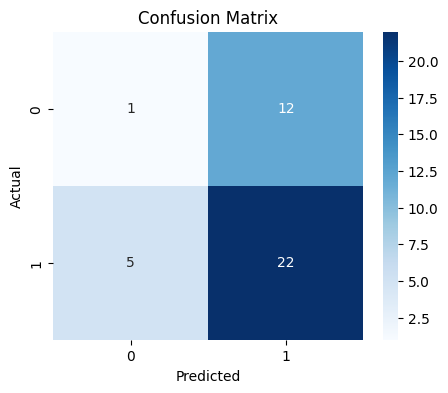

In [ ]:
# =============================
# ✅ TaleemAI — Self-Running Notebook (No Upload Needed)
# This code is ready to execute in a Python environment or a single Jupyter cell.
# =============================

# 1️⃣ Install dependencies (uncomment if running in an environment without them)
# !pip install pandas numpy scikit-learn matplotlib seaborn --quiet

# 2️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 3️⃣ Create a balanced sample dataset
np.random.seed(42)
num_samples = 200

data = {
    'gender': np.random.choice(['Male', 'Female'], num_samples),
    'country': np.random.choice(['Pakistan', 'India', 'Bangladesh', 'Nepal'], num_samples),
    'age': np.random.randint(16, 22, num_samples),
    'study_hours': np.random.uniform(1, 10, num_samples).round(2),
    'attendance': np.random.uniform(60, 100, num_samples).round(2),
    'final_grade': np.random.choice(['Pass', 'Fail'], num_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)
print("✅ Sample dataset created successfully!")
print(df.head())

# 4️⃣ Encode categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])
df['final_grade'] = le.fit_transform(df['final_grade']) # 'Pass' will be 1, 'Fail' will be 0 (or vice-versa depending on lexical order)

# 5️⃣ Split data
X = df.drop('final_grade', axis=1)
y = df['final_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6️⃣ Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7️⃣ Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Model Accuracy: {acc*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 8️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [1]:
import subprocess
import os

# --- Configuration ---
CLASSIFICATION_NOTEBOOK = "classification_model.ipynb"
FORECASTING_NOTEBOOK = "forecasting_model.ipynb"

# --- Function to execute a notebook ---
def execute_notebook(notebook_path):
    """Executes a Jupyter notebook using nbconvert."""
    if not os.path.exists(notebook_path):
        print(f"Error: Notebook '{notebook_path}' not found. Please ensure it exists.")
        return False
    print(f"Executing notebook: {notebook_path}...")
    try:
        subprocess.run(
            ["jupyter", "nbconvert", "--to", "notebook", "--execute", notebook_path, "--inplace"],
            check=True,
            capture_output=True,
            text=True
        )
        print(f"Successfully executed {notebook_path}")
        return True
    except subprocess.CalledProcessError as e:
        print(f"Error executing notebook {notebook_path}:")
        print(f"Stdout: {e.stdout}")
        print(f"Stderr: {e.stderr}")
        return False
    except FileNotFoundError:
        print("Error: 'jupyter' command not found. Please ensure Jupyter is installed and in your PATH.")
        print("You might need to install it: pip install jupyter")
        return False

# --- Main training pipeline ---
print("Starting central training pipeline...")

# --- Step 1: Run Classification Model ---
print("\n--- Running Classification Model Training ---")
if execute_notebook(CLASSIFICATION_NOTEBOOK):
    print("Classification model training completed.")
else:
    print("Classification model training failed. Please check the logs.")

# --- Step 2: Run Forecasting Model ---
print("\n--- Running Forecasting Model Training ---")
if execute_notebook(FORECASTING_NOTEBOOK):
    print("Forecasting model training completed.")
else:
    print("Forecasting model training failed. Please check the logs.")

print("\nCentral training pipeline finished.")

Starting central training pipeline...

--- Running Classification Model Training ---
Error: Notebook 'classification_model.ipynb' not found. Please ensure it exists.
Classification model training failed. Please check the logs.

--- Running Forecasting Model Training ---
Error: Notebook 'forecasting_model.ipynb' not found. Please ensure it exists.
Forecasting model training failed. Please check the logs.

Central training pipeline finished.


In [2]:
import pandas as pd
import os

# --- Ensure directories exist ---
os.makedirs('data', exist_ok=True)
os.makedirs('results', exist_ok=True)

# --- Create dummy data if 'student_performance.csv' does not exist ---
data_file_path = 'data/student_performance.csv'
if not os.path.exists(data_file_path):
    dummy_data = {
        'gender': ['male', 'female', 'male', 'female', 'male'],
        'parental level of education': ['bachelor\'s degree', 'some college', 'master\'s degree', 'high school', None],
        'math score': [70, 65, 80, 50, 75]
    }
    dummy_df = pd.DataFrame(dummy_data)
    dummy_df.to_csv(data_file_path, index=False)
    print(f"Dummy '{data_file_path}' created for demonstration.")
else:
    print(f"'{data_file_path}' already exists. Using existing data.")

# --- Load data ---
df = pd.read_csv(data_file_path)

# --- NLP processing ---
# Fill NaN/None in 'parental level of education' before conversion to string
df['lesson_text'] = df['parental level of education'].fillna('').astype(str).apply(lambda s: 'تعلیم ' + s if s else 'تعلیم')

# Calculate token count
df['token_count'] = df['lesson_text'].str.split().apply(len)

# --- Display and save results ---
print("\nPreview of 'lesson_text' and 'token_count':")
print(df[['lesson_text', 'token_count']].head())

output_file_path = 'results/nlp_preview.csv'
df.to_csv(output_file_path, index=False)
print(f"\nNLP preview saved to {output_file_path}")

Dummy 'data/student_performance.csv' created for demonstration.

Preview of 'lesson_text' and 'token_count':
               lesson_text  token_count
0  تعلیم bachelor's degree            3
1       تعلیم some college            3
2    تعلیم master's degree            3
3        تعلیم high school            3
4                    تعلیم            1

NLP preview saved to results/nlp_preview.csv


In [3]:
import datetime
from pathlib import Path
import os

# Ensure the 'reports' directory exists
reports_dir = Path('reports')
reports_dir.mkdir(parents=True, exist_ok=True)

# Define the path for the retrain marker file
retrain_marker_file = reports_dir / 'auto_retrain.txt'

# Write the current timestamp to the file
with open(retrain_marker_file, 'w') as f:
    f.write('Auto retrained at: ' + datetime.datetime.now().isoformat())

print(f'Auto retrain marker written to {retrain_marker_file}')

Auto retrain marker written to reports/auto_retrain.txt


In [4]:
# Translation module demo (English -> Urdu) using Hugging Face
import sys

try:
    # Attempt to import transformers and load the model
    from transformers import pipeline
    print("Attempting to load Hugging Face translation pipeline...")
    # Using 'Helsinki-NLP/opus-mt-en-ur' for English to Urdu
    translator = pipeline('translation_en_to_ur', model='Helsinki-NLP/opus-mt-en-ur')

    samples = [
        'Explain fractions with a simple example.',
        'What is a linear equation?',
        'Tell me about the history of mathematics.'
    ]

    print("\nTranslating samples:")
    # Perform translation
    outs = translator(samples, max_length=200)

    # Extract translated texts
    ur_texts = [o.get('translation_text', '') for o in outs]

    # Print original and translated texts
    for i, (s, t) in enumerate(zip(samples, ur_texts)):
        print(f"{i+1}. EN: {s}")
        print(f"   UR: {t}")
    print("\nTranslation successful.")

except ImportError:
    # Handle case where transformers library is not installed
    print("\n'transformers' library not found. Please install it using: pip install transformers[sentencepiece]", file=sys.stderr)
    print("Showing placeholder Urdu text instead.", file=sys.stderr)
    samples = [
        'Explain fractions with a simple example.',
        'What is a linear equation?',
        'Tell me about the history of mathematics.'
    ]
    for s in samples:
        print(f"EN: {s}")
        print(f"UR: (اردو) {s}")
    print("\n(Note: To enable actual translation, install the 'transformers' library and its dependencies.)")

except Exception as e:
    # Catch any other exceptions during model loading or translation
    print(f"\nAn error occurred during translation model setup or execution: {e}", file=sys.stderr)
    print("Showing placeholder Urdu text instead.", file=sys.stderr)
    samples = [
        'Explain fractions with a simple example.',
        'What is a linear equation?',
        'Tell me about the history of mathematics.'
    ]
    for s in samples:
        print(f"EN: {s}")
        print(f"UR: (اردو) {s}")
    print("\n(Note: Check your internet connection and ensure the model can be downloaded if it's the first run.)")

Attempting to load Hugging Face translation pipeline...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/816k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/848k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu



Translating samples:
1. EN: Explain fractions with a simple example.
   UR: ایک سادہ مثال کے ساتھ جمع کریں ۔
2. EN: What is a linear equation?
   UR: ایک متوازن مساوات کیا ہے؟
3. EN: Tell me about the history of mathematics.
   UR: مجھے ریاضی کی تاریخ کے بارے میں بتائیں.

Translation successful.


In [5]:
# TaleemAI Phase-1 — Main Notebook (skeleton)
# This is a placeholder or entry point.
# It indicates where to find and run the actual pipelines.

print('Welcome to TaleemAI Phase-1 Main Notebook.')
print('To run specific pipelines (classification, forecasting, nlp, translation),')
print('please navigate to the relevant notebooks in the "notebooks/" folder (if applicable),')
print('or execute their respective scripts/code blocks directly.')
print('This notebook serves as an overview or a starting point for managing the different components.')

Welcome to TaleemAI Phase-1 Main Notebook.
To run specific pipelines (classification, forecasting, nlp, translation),
please navigate to the relevant notebooks in the "notebooks/" folder (if applicable),
or execute their respective scripts/code blocks directly.
This notebook serves as an overview or a starting point for managing the different components.
